<a href="https://colab.research.google.com/github/JuJu2181/LearnML/blob/master/ML_Day3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DAY 3: 
### Type 1: Linear Regression
Linear regression uses a straight line to fit a linear data
- Pumpkin Pricing 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data 
pumpkins  = pd.read_csv('https://raw.githubusercontent.com/JuJu2181/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [ ]:
#extracting the pumpkins with package bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
new_columns = ['Package','Variety','City Name','Month','Low Price','High Price','Date','City Num','Variety Num']
#removing all unnecessary columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
#calculating the average price 
price = (pumpkins['Low Price']+pumpkins['High Price'])/2
#extracting month fomr the date 
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
#updating the price of the package based on 1 1/9 or 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price*2
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


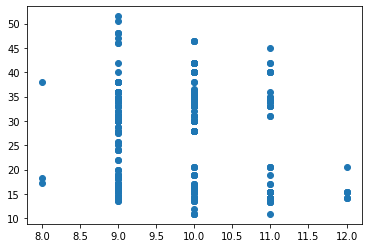

In [ ]:
#basic scatterplot of the data
plt.scatter('Month','Price',data=new_pumpkins)

In [ ]:
#Using Scikit Learn to predict which package of pumpkin will have best pumpkin price 
from sklearn.preprocessing import LabelEncoder
# converting all strings to numeric values
new_pumpkins.iloc[:,0:-1] = new_pumpkins.iloc[:,0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364


In [ ]:
#drop all null data 
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int64  
 2   City        415 non-null    int64  
 3   Package     415 non-null    int64  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 25.9 KB


In [ ]:
#creating a dataframe from only package and price as we are building a model to predict price of a package 
new_columns = ['Package','Price']
lin_pumpkins = new_pumpkins.drop([c for  c in new_pumpkins.columns if c not in new_columns],axis='columns')
lin_pumpkins

,Package,Price
70,0,13.636364
71,0,16.363636
72,0,16.363636
73,0,15.454545
74,0,13.636364
...,...,...
1738,2,30.000000
1739,2,28.750000
1740,2,25.750000
1741,2,24.000000


In [ ]:
#Assiging X and y to feature and label 
X = lin_pumpkins.values[:,:1]
y = lin_pumpkins.values[:,1:2]

In [ ]:
#building regression model using scikit learn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#splitting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#linear regression model
lin_reg = LinearRegression()
#fitting the model using training data 
lin_reg.fit(X_train,y_train)

#using the model to predict values of y based on test values of X
prediction = lin_reg.predict(X_test)
print(prediction)

#calculating accuracy score
accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ',accuracy_score)

[[34.33429787]
 [20.20144037]
 [39.04525038]
 [39.04525038]
 [24.91239287]
 [24.91239287]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [34.33429787]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [39.04525038]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [24.91239287]
 [29.62334537]
 [34.33429787]
 [20.20144037]
 [39.04525038]
 [34.33429787]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [20.20144037]
 [39.04525038]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [39.04525038]
 [29.62334537]
 [24.91239287]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334

Here the low accuracy of the model is because of less correlation in the data

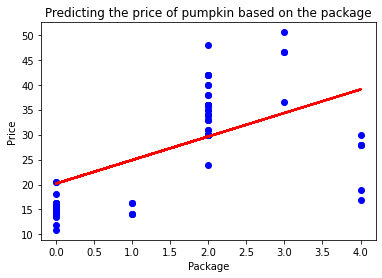

In [ ]:
#visualizing the line that's drawn in the process
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,prediction,color='red',linewidth=2)

plt.xlabel('Package')
plt.ylabel('Price')
plt.title('Predicting the price of pumpkin based on the package')

plt.show()

In [ ]:
#testing the model against a hypothetical variety
lin_reg.predict(np.array([[2.75]]))

array([[33.15655975]])

In [ ]:
#checking the metrics off the model
print('MAE: ',mean_absolute_error(y_test,prediction))
print('MSE: ',mean_squared_error(y_test,prediction))
print('R2 Score: ',r2_score(y_test,prediction))


MAE:  6.548360965286833
MSE:  61.80385495574707
R2 Score:  0.4681102208278508


### Type 2: Polynomial Regression
Polynomial regression uses curved line to best fit non linear data

In [ ]:
#recreating the dataframe from original pumpkin data 
new_columns = ['Variety','Package','City','Month','Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns],axis=1)
poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.636364
71,1,3,1,0,16.363636
72,2,3,1,0,16.363636
73,2,3,1,0,15.454545
74,2,3,1,0,13.636364
...,...,...,...,...,...
1738,1,1,9,2,30.000000
1739,1,1,9,2,28.750000
1740,1,1,9,2,25.750000
1741,1,1,9,2,24.000000


To visualize the correlations between the data in dataframes is by using the coolwarm chart

In [ ]:
#Using coolwarm chart for visualization
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.606171
Price,-0.148783,-0.863479,0.323640,0.606171,1.000000


Scikit learn has a helpful API for building polynomial regression models the make_pipeline API. A pipeline is created with a chain of estimators. Here pipeline consists of polynomial features, or predictions that form a non linear path

In [ ]:
#building X and y from package and price respectively
X = poly_pumpkins.iloc[:,3:4].values
y = poly_pumpkins.iloc[:,4:5].values 

In [ ]:
#creating a pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

#using make_pipeline to create a model for polynomial regression
pipeline = make_pipeline(PolynomialFeatures(4),LinearRegression())

#splitting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#fitting the model
pipeline.fit(np.array(X_train),y_train)

y_pred = pipeline.predict(X_test)

We now need to create a new dataframe wita sorted data so that pipeline can create a sequence

[[ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 2.         34.2974359 ]
 [ 2.         34.2974359 ]
 [ 2.         34.2974359 ]
 

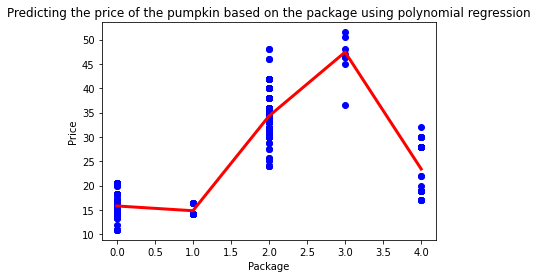

In [ ]:
#Creating a sequence
df = pd.DataFrame({'x':X_test[:,0],'y':y_pred[:,0]})
#inplace=True means the current dataframe will be modifiec
df.sort_values(by='x',inplace=True)
# converting dataframe to numpy array
points = pd.DataFrame(df).to_numpy()
print(points)
#creating a scatterplot to visualize the polynomial regression
plt.scatter(X,y,color="blue")
plt.plot(points[:,0],points[:,1],color="red",linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.title('Predicting the price of the pumpkin based on the package using polynomial regression')
plt.show()

In [ ]:
#Checking model accuracy and errors 
accuracy_score = pipeline.score(X_train,y_train)
print(f'Model Accuracy: {accuracy_score}')
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('R2 Score: ',r2_score(y_test,y_pred))

Model Accuracy: 0.8537946517073784
MAE:  2.6809494597136663
MSE:  14.584047030729515
R2 Score:  0.8744883218018484


In [ ]:
#predicting the price of pumpkin 
pipeline.predict(np.array([[2.75]]))

array([[46.34509342]])

So Polynomial Regression works better for predicting price of pumpkin that linear regression in this dataset

## Day 4: LOGISTIC REGRESSION
- Linear Regression used to best fit line and to predict output which is a continouos value
- Logistic Regression used to find probability of an event occuring which is used for categorization problems
E.g. to predict if the disease is contagious or not, is the candy chocolate or not

#### Here We are predicting given some variables what color a given pumpkin is likely to be Orange or White
- In linear regression more the variables were correlated more accuracy was obtained but in logistic regression more accurate results are obtained if we use more data

In [1]:
#Start to build Logistic regression model 
print('Begin Day 4')

Begin Day 4


In [2]:
#importing the pumpkin data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data 
pumpkins  = pd.read_csv('https://raw.githubusercontent.com/JuJu2181/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
#tidying the data 
from sklearn.preprocessing import LabelEncoder 
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis='columns')
new_pumpkins.dropna(inplace=True)
#LabelEncoder will encode the target labels with values between 0 and n_classes-1
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

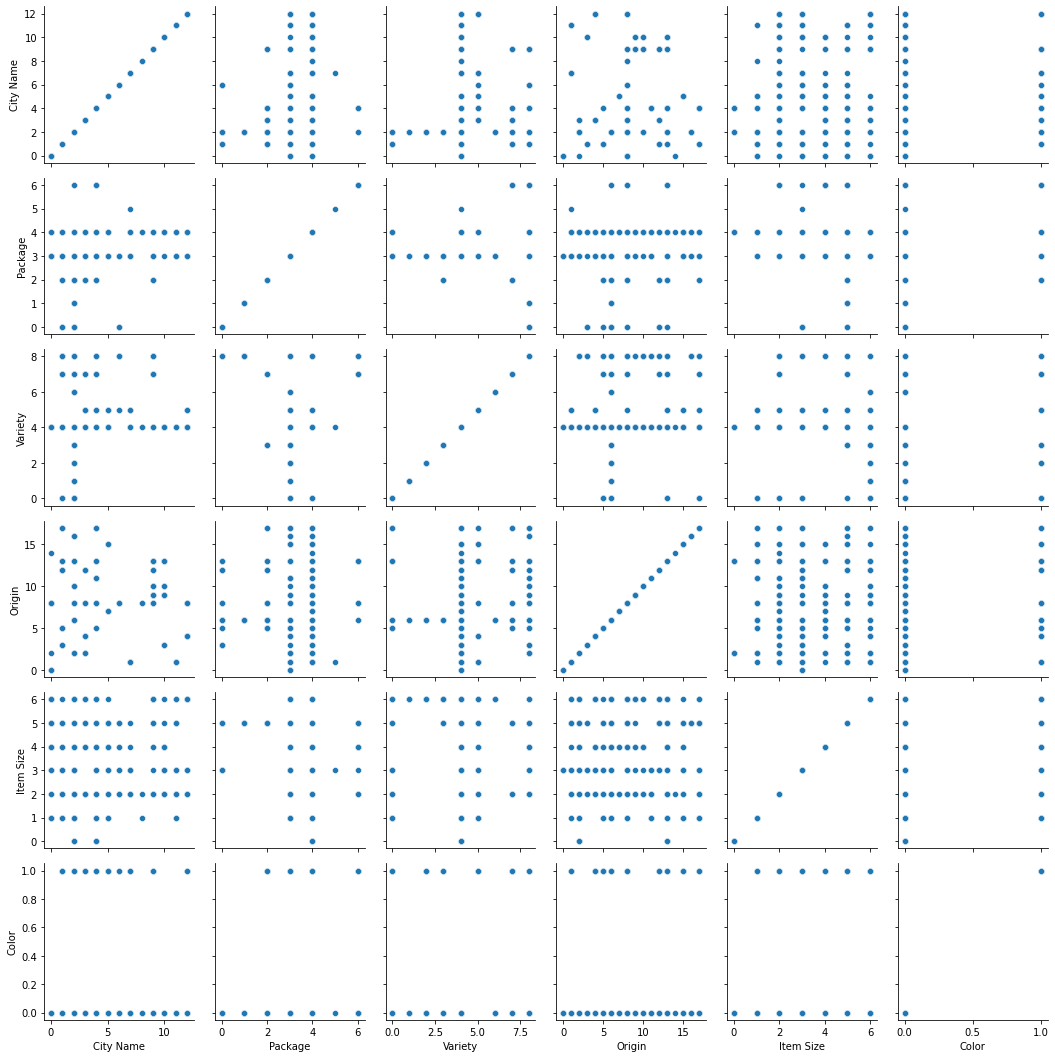

In [4]:
#using seaborn for data visualization
import seaborn as sns 
#using PairGrid to compare the distributions of data side by side 
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


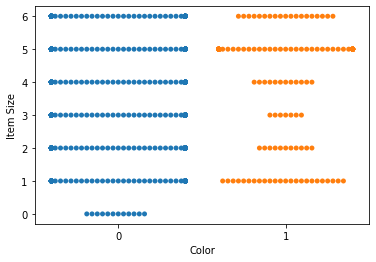

In [5]:
#using swarm plot to visualize the relationship of the category 
sns.swarmplot(x="Color",y="Item Size",data=new_pumpkins)

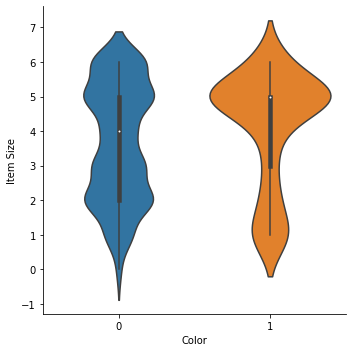

In [6]:
#Using violin plot to visualize how data is distributed in two categories 
sns.catplot(x="Color",y="Item Size",kind="violin",data=new_pumpkins)

Linear Regressio is based on the ordinary least squares for predicting the data but Logistic regression uses the concept of maximum likelihood using sigmoid functions
- Sigmoid function on a plot looks like S shape and it takes a value that maps somewhere between 0 and 1

In [7]:
#building a model to find binary classification of color i-e orange or not_orange
from sklearn.model_selection import train_test_split
Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X= new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
#to train the model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(classification_report(y_test,predictions))
print('Predicted Labels: ',predictions)
print('Accuracy: ',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted Labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


To understand a model more easily we can use confusion matrix
- A confusion matrix or error matrix is a table that expresses your model's true vs false positives thus gauging the accuracy of predictions

In [9]:
#to use confusion metrics 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,predictions)

array([[162,   4],
       [ 33,   0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


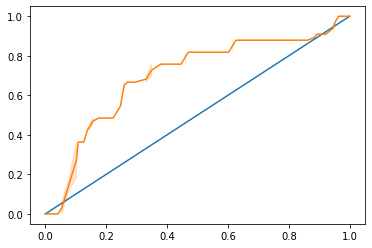

In [10]:
#Visualization usig ROC score 
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)
#calculate ROC curve 
fpr, tpr, thresholds = roc_curve(y_test,y_scores[:,1])
sns.lineplot([0,1],[0,1])
sns.lineplot(fpr,tpr)

In [11]:
#usinf roc_auc_score API to compute the actual area under curve(AUC)
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
